In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

# Load the image
img_path = 'volcano.png'
touched_path = 'volcano_start.png'
original_image = Image.open(img_path).convert('L') # Convert image to grayscale
touched_image = Image.open(touched_path).convert('L')
img_array = np.array(original_image)
touched_array = np.array(touched_image)


In [2]:
# Create the arrays as described
touched = np.zeros_like(img_array, dtype=bool)
elevation = np.zeros_like(img_array, dtype=np.int32)

# Start with the specified pixel touched
touched[touched_array == 255] = True

# Redefine the kernel for the new adjacency rules
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=bool)


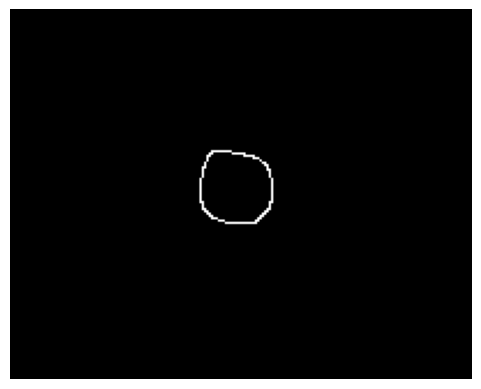

In [3]:
plt.imshow(touched, cmap='gray')
plt.axis('off')  # No axis for cleaner look
plt.show()

In [4]:
def rolling_average(elevation, kernel, iterations=1):
    for _ in range(iterations):
        elevation = convolve(elevation, kernel, mode='reflect') / kernel.sum()
    return elevation

In [5]:
# Process until all pixels are touched, with the new kernel
frame = 0
while not touched.all():
    # On 4 out of 5 frames, touch adjacent white pixels
    if frame % 5 != 0:
        white_pixels = (img_array == 255)
        white_adjacent = convolve(white_pixels & touched, kernel, mode='constant', cval=0) & white_pixels
        touched |= white_adjacent
    # On every 5th frame (1 out of 5), touch all adjacent pixels
    else:
        touched |= convolve(touched, kernel, mode='constant', cval=0)

    # Update elevations
    elevation[touched] -= 1
    elevation[~touched] += 1

    frame += 1

# Randomly increment or decrement each pixel by one
random_change = np.random.normal(loc=0, scale=5, size=elevation.shape)
elevation = elevation.astype(np.float64)
elevation += random_change

# Rolling average to smooth it out
elevation = rolling_average(elevation, kernel, iterations=2)

print((elevation.min(), elevation.max()))

erange = (100, 200)
# Rescale elevations to 0-255
elevation -= elevation.min()
elevation = (elevation / elevation.max()) * (erange[1] - erange[0]) + erange[0]
# elevation = (elevation / elevation.max()) * 255
elevation = elevation.astype(np.uint8)

elevation = 255 - elevation
elevation.shape

(-326.96314454939994, 321.9284497212253)


(160, 200)

In [6]:
save_path = 'volcano_generated.png'
Image.fromarray(elevation, 'L').save(save_path)

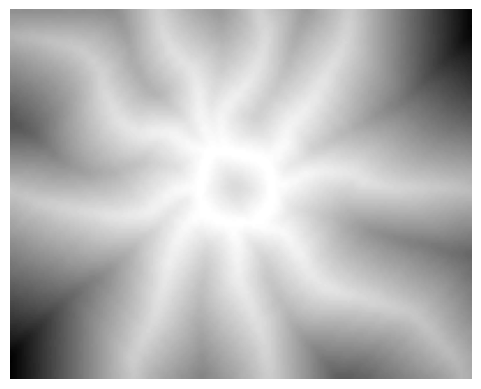

In [7]:
# Show the new image
plt.imshow(elevation, cmap='gray')
plt.axis('off')  # No axis for cleaner look
plt.show()
